# **Rock or Mine Classification System Using Machine Learning**

Developed a Python-based system to predict whether an object is a Rock or Mine using Sonar signal data. **Implemented Logistic Regression, Decision Tree and Random Forest models** comparing performance with and without **Principal Component Analysis (PCA) for dimensionality reduction**. Analyzed model efficiency and accuracy across scenarios.



## **Overview of the dataset**

The Sonar signal dataset contains 61 features and 208 entries. These features could represent various characteristics extracted from the Sonar signal data, such as signal strength, frequency, amplitude, phase, time intervals, and other signal processing measurements. Each feature provides a specific type of information about the Sonar signal that may help in distinguishing between a Rock and a Mine.

In other words, the dataset has 208 rows, with each row representing a specific object (either a Rock or a Mine) and the 61 columns corresponding to the features of that object.

In [152]:
#Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score, KFold


In [153]:
# from sklearn.linear_model import Log

## 1. Given data

In [154]:
# Load the dataset
sonar_data = pd.read_csv('/content/sonar data.csv',header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [155]:
sonar_data.shape

(208, 61)

In [156]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [157]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


In [158]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


## **Data Preprocessing: Without PCA**




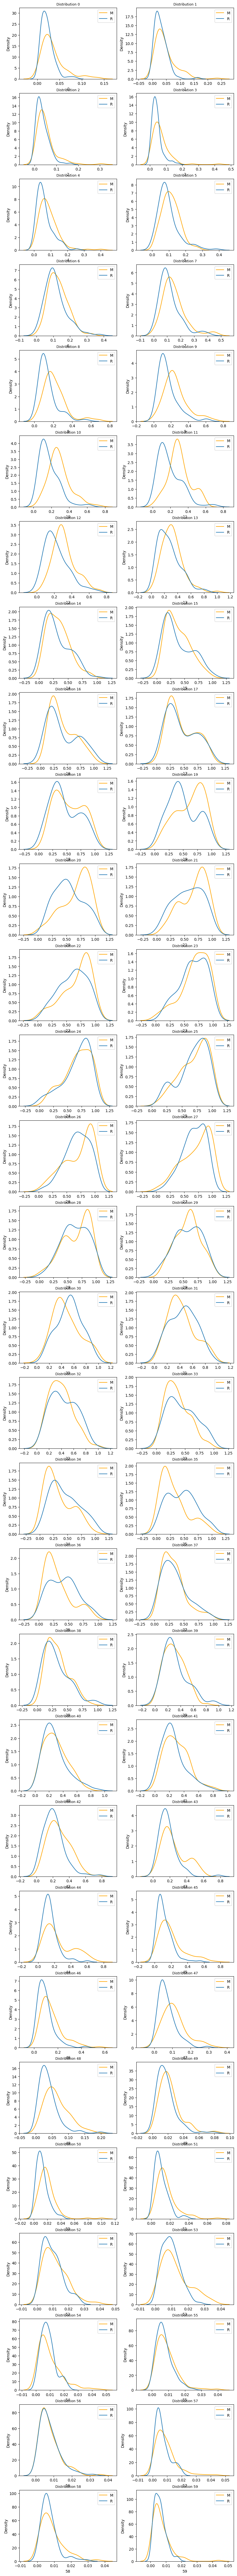

In [159]:
#EDA
plt.figure(figsize=(10,120))
for i, num in enumerate(range(60)):
    plt.subplot(30,2, i+1)
    sns.kdeplot(sonar_data[sonar_data[60] == 'M'][num], label = 'M', color='orange')
    sns.kdeplot(sonar_data[sonar_data[60] == 'R'][num], label = 'R')
    plt.legend()
    plt.title(f'Distribution {num}', fontsize=9)

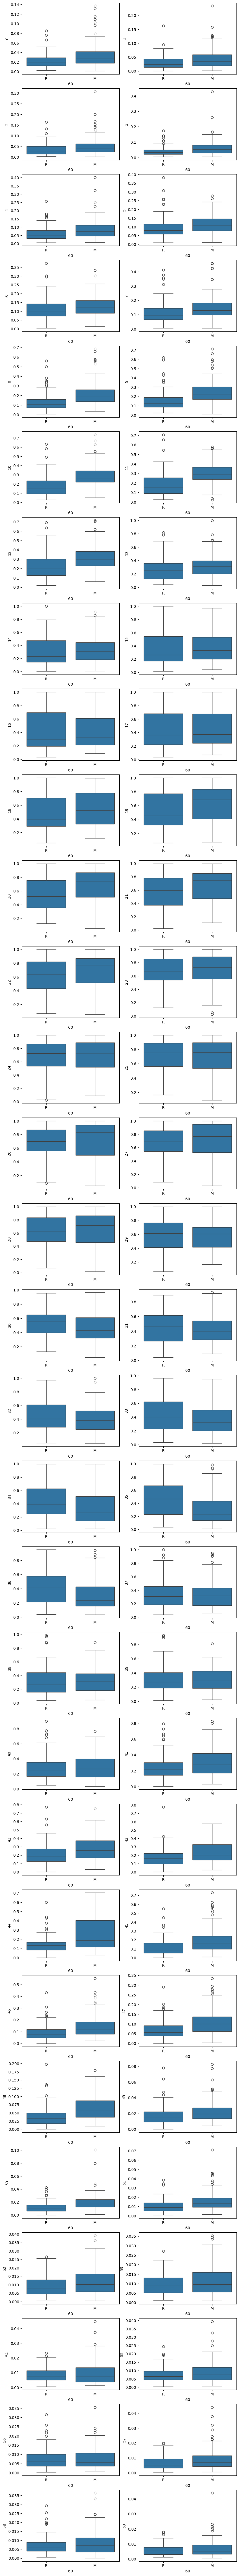

In [160]:
plt.figure(figsize=(10,120))
for i, num in enumerate(range(60)):
    plt.subplot(30,2, i+1)
    sns.boxplot(y=sonar_data[num], x=sonar_data[60])

In [161]:
# separate the X's and Y
X = sonar_data.drop(columns=60,axis=1)
Y = sonar_data[60]

## Training and Testing the data

In [162]:
# Split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=42)

### Logistic Regression

In [163]:
# Create a logistic Regression
model1=LogisticRegression()
model1.fit(X_train,Y_train)

# Accuracy on Training Data
X_train_prediction_1 = model1.predict(X_train)
training_data_accuracy_1 = accuracy_score(Y_train,X_train_prediction_1)
print('Training Data Accuracy for Logistic Regression = ',round(training_data_accuracy_1*100,2))

# Accuracy on Test Data
X_test_prediction_1 = model1.predict(X_test)
test_data_accuracy_1 = accuracy_score(Y_test,X_test_prediction_1)
print('Test Data Accuracy for Logistic Regression = ',round(test_data_accuracy_1*100,2))

scores = cross_val_score(model1, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# View the coefficients
print("Coefficients:", model1.coef_)

# View the intercept
print("Intercept:", model1.intercept_)



Training Data Accuracy for Logistic Regression =  84.14
Test Data Accuracy for Logistic Regression =  76.19
Cross-validation scores: [0.45238095 0.76190476 0.61904762 0.82926829 0.48780488]
Mean cross-validation score: 0.6300813008130082
Coefficients: [[-0.12929048 -0.16144168 -0.16291138 -0.41308031 -0.19577253  0.16602402
   0.24980204  0.15566486 -0.78230095 -1.01457914 -1.16493524 -1.13509043
  -0.88586376 -0.08232783  0.40800544  0.67440087  0.58948412  0.10647786
  -0.41483603 -0.78514842 -0.88140591 -0.64331664 -0.22339727  0.02227197
   0.22372156  0.54375442  0.0807213  -0.68847574 -0.10892942  0.10989564
   0.83069912 -0.45502549  0.08108413  0.51769196  0.24828169  1.01268617
   0.67100209 -0.42917476 -0.7670712   0.14347872 -0.4436598  -0.51989355
  -0.88690819 -0.90898481 -1.00706867 -0.83276606 -0.67987929 -0.66475691
  -0.40331045 -0.07702728 -0.12167126 -0.11263023 -0.06200782 -0.07632494
  -0.00989598 -0.05026058 -0.0130191  -0.0639945  -0.04673994 -0.02201714]]
Interc

### Decision Tree

In [164]:
# develop the Decision Tree
model2 = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validation score: 0.7241379310344828


Training Data Accuracy for Decision Tree =  95.86
Test Data Accuracy for Decision Tree =  60.32
Cross-validation scores: [0.47619048 0.69047619 0.73809524 0.80487805 0.48780488]
Mean cross-validation score: 0.6394889663182346

[Text(0.5, 0.9285714285714286, 'x[9] <= 0.163\nentropy = 0.997\nsamples = 145\nvalue = [77, 68]'), Text(0.2631578947368421, 0.7857142857142857, 'x[3] <= 0.058\nentropy = 0.824\nsamples = 62\nvalue = [16, 46]'), Text(0.381578947368421, 0.8571428571428572, 'True  '), Text(0.15789473684210525, 0.6428571428571429, 'x[43] <= 0.393\nentropy = 0.482\nsamples = 48\nvalue = [5, 43]'), Text(0.10526315789473684, 0.5, 'x[54] <= 0.014\nentropy = 0.267\nsamples = 44\nvalue = [2, 42]'), Text(0.05263157894736842, 0.35714285714285715, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40]'), Text(0.15789473684210525, 0.35714285714285715, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'), Text(0.21052631578947367, 0.5, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'), Text(0.3684210526315789, 0

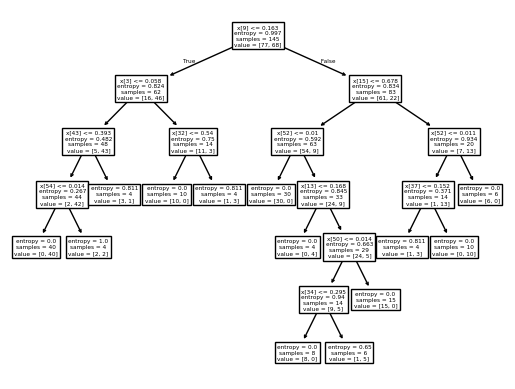

In [165]:
# Develop the optimum Decision Tree
model2 = grid_search.best_estimator_
model2.fit(X_train,Y_train)

# Accuracy on Training Data
X_train_prediction_2 = model2.predict(X_train)
training_data_accuracy_2 = accuracy_score(Y_train,X_train_prediction_2)
print('Training Data Accuracy for Decision Tree = ',round(training_data_accuracy_2*100,2))

# Accuracy on Test Data
X_test_prediction_2 = model2.predict(X_test)
test_data_accuracy_2 = accuracy_score(Y_test,X_test_prediction_2)
print('Test Data Accuracy for Decision Tree = ',round(test_data_accuracy_2*100,2))
scores = cross_val_score(model2, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

print('')

print(plot_tree(model2))

### Random Forest

In [166]:
# Create a Random Forest classifier
model3 = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [40, 60, 80],
    'max_depth': [None, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
Best cross-validation score: 0.8482758620689654


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
291 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [167]:
# Optimum Random Forest
model3 = grid_search.best_estimator_
model3.fit(X_train, Y_train)

# Accuracy on Training Data
X_train_prediction_3 = model3.predict(X_train)
training_data_accuracy_3 = accuracy_score(Y_train,X_train_prediction_3)
print('Training Data Accuracy for Random Forest = ',round(training_data_accuracy_3*100,2))

# Accuracy on Test Data
X_test_prediction_3 = model3.predict(X_test)
test_data_accuracy_3 = accuracy_score(Y_test,X_test_prediction_3)
print('Test Data Accuracy for Randaom Forest = ',round(test_data_accuracy_3*100,2))

scores = cross_val_score(model3, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))


Training Data Accuracy for Random Forest =  100.0
Test Data Accuracy for Randaom Forest =  82.54
Cross-validation scores: [0.47619048 0.73809524 0.66666667 0.73170732 0.6097561 ]
Mean cross-validation score: 0.6444831591173055


## **Data preprocessing: With PCA**

In [168]:
# Train Test split to avoid data leakage
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y, test_size=0.3,random_state=42)

In [169]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [170]:
# standardize the test data
X_test_scaled = scaler.transform(X_test)

In [171]:
# Apply PCA to reduce to a specified number of components
pca = PCA(n_components=29)
X_train_pca = pca.fit_transform(X_train_scaled)


In [173]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", cumulative_variance)


Explained variance ratio: [0.21493063 0.19911782 0.08217291 0.05510302 0.04683461 0.03951983
 0.03454591 0.03006995 0.0278354  0.02277149 0.02090115 0.0201839
 0.01818303 0.01536103 0.01439578 0.01318591 0.01285869 0.01096644
 0.00952121 0.00909868 0.00892877 0.00854035 0.00775728 0.00708918
 0.006447   0.00591641 0.00552307 0.00494598 0.00466623]
Cumulative explained variance: [0.21493063 0.41404846 0.49622137 0.55132439 0.598159   0.63767883
 0.67222474 0.70229469 0.73013009 0.75290158 0.77380272 0.79398662
 0.81216966 0.82753068 0.84192647 0.85511238 0.86797107 0.87893751
 0.88845872 0.89755741 0.90648617 0.91502653 0.9227838  0.92987298
 0.93631997 0.94223639 0.94775945 0.95270543 0.95737166]


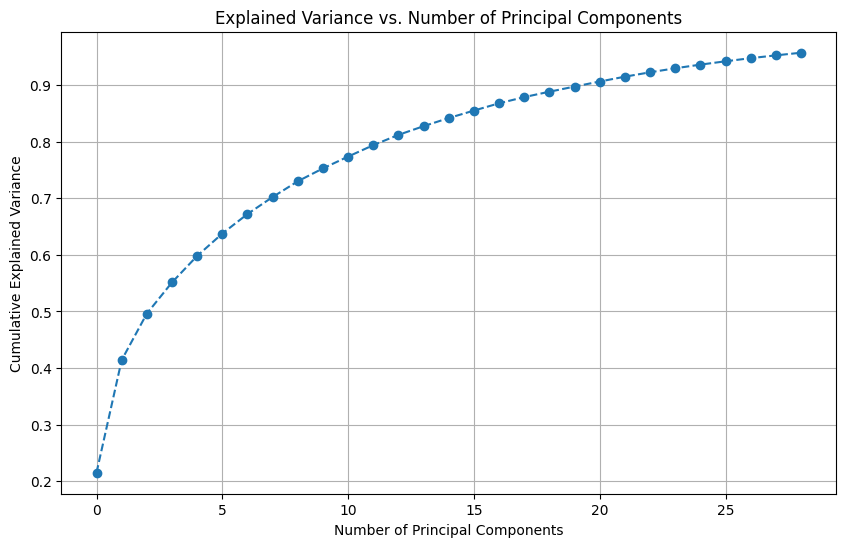

In [174]:
import matplotlib.pyplot as plt

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [175]:
principal_df = pd.DataFrame(data=X_train_pca)
principal_df


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-2.773651,-2.549621,-0.737514,-0.545784,-0.574976,0.683484,-1.158368,-0.073922,-0.478351,0.612517,...,-0.358382,0.765063,0.567174,0.177230,-0.097799,-0.402720,-0.201740,-0.267044,-0.266586,0.125514
1,6.046474,-1.867350,4.289298,1.365957,0.748838,-2.804704,1.555436,0.051350,-0.960653,-0.569692,...,-0.230176,0.859576,0.998834,0.207988,1.034994,0.133268,0.397667,-0.314920,-0.847742,-0.870870
2,-4.984945,1.863895,0.055430,-1.825040,0.717784,0.678039,0.533918,-1.485404,0.820313,-0.319310,...,-0.707593,-0.227376,1.198174,-0.542411,-0.028362,1.050713,-0.486820,0.012763,-0.389754,0.683847
3,-2.995130,-2.739997,-2.507640,1.288474,-1.255322,1.503556,0.665797,0.945604,0.441601,0.298252,...,0.689541,1.098991,0.094340,0.426346,0.549647,-0.842866,-1.187853,-0.276989,-0.316017,0.243973
4,4.333503,-4.714134,5.262031,0.387287,-1.074701,-0.361684,0.907059,-0.166058,-1.335608,0.350661,...,1.122129,0.646939,0.405358,0.883078,-0.025001,0.491651,-0.417717,0.223999,0.141246,0.773481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,-2.263461,1.418701,0.354197,1.250699,-2.731289,0.276486,-1.652660,1.352068,-0.369397,1.068949,...,0.372616,0.904132,-1.253344,0.325326,-0.287355,-0.921951,0.932803,1.239532,0.151345,0.575453
141,-1.740562,-0.854499,-2.274265,2.954096,-1.032742,2.032780,-0.315060,0.508983,0.173907,-0.043147,...,0.379378,0.365346,0.497365,0.589042,0.011531,-1.312722,-0.377090,0.069294,0.493760,0.734617
142,-2.212793,4.270998,-1.761439,-0.768545,1.042974,0.258309,-0.306334,-0.611911,-0.455220,1.201161,...,1.196769,0.308425,-0.000579,-0.132975,-0.069254,0.176994,-0.556929,-0.181711,-0.206197,-0.447077
143,7.901492,-2.936452,0.422123,-2.597464,2.430768,-0.438278,1.114930,-0.499948,-3.398528,2.528912,...,-2.829748,1.499250,-1.570900,-1.213043,0.380138,-0.263799,-0.070803,0.859452,-0.619278,-0.063111


In [176]:
# Apply PCA to reduce to test data

X_test_pca = pca.transform(X_test_scaled)


## Training and Testing the data

### Logistic Regression

In [177]:
# Create a logistic Regression
model5=LogisticRegression()
model5.fit(X_train_pca,Y_train)

# Accuracy on Training Data
X_train_prediction_5 = model5.predict(X_train_pca)
training_data_accuracy_5 = accuracy_score(Y_train,X_train_prediction_5)
print('Training Data Accuracy for Logistic Regression = ',round(training_data_accuracy_5*100,2))

# Accuracy on Test Data
X_test_prediction_5 = model5.predict(X_test_pca)
test_data_accuracy_5 = accuracy_score(Y_test,X_test_prediction_5)
print('Test Data Accuracy for Logistic Regression = ',round(test_data_accuracy_5*100,2))

scores = cross_val_score(model5, X_train_pca, Y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# View the coefficients
print("Coefficients:", model5.coef_)

# View the intercept
print("Intercept:", model5.intercept_)


Training Data Accuracy for Logistic Regression =  86.21
Test Data Accuracy for Logistic Regression =  77.78
Cross-validation scores: [0.82758621 0.82758621 0.72413793 0.82758621 0.75862069]
Mean cross-validation score: 0.7931034482758621
Coefficients: [[-0.47184755 -0.30339322  0.93640957  0.04480558 -0.40884847  0.34547947
   0.29292832 -1.46175116 -0.46409886 -0.02388199  0.00367031 -0.28513028
  -0.04055684  0.22061607 -0.83209011 -0.42447586  0.2261406   0.26339755
  -0.16132867 -0.00389199 -0.26690721 -0.81609904 -0.04191419 -0.19692452
  -0.24870205  0.89430432  0.1139376  -0.15978278  0.04711386]]
Intercept: [-0.53036961]


### Decision Tree

In [178]:
# develop the Decision Tree
model6 = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model6, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_pca, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 0.7379310344827587


Training Data Accuracy for Decision Tree =  93.1
Test Data Accuracy for Decision Tree =  77.78
Cross-validation scores: [0.66666667 0.66666667 0.73333333 0.73333333 0.46666667 0.85714286
 0.85714286 0.64285714 0.57142857 0.57142857]
Mean cross-validation score: 0.6766666666666665

[Text(0.5666666666666667, 0.9375, 'x[2] <= -1.661\ngini = 0.498\nsamples = 145\nvalue = [77, 68]'), Text(0.5, 0.8125, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'), Text(0.5333333333333333, 0.875, 'True  '), Text(0.6333333333333333, 0.8125, 'x[7] <= 0.401\ngini = 0.469\nsamples = 109\nvalue = [41, 68]'), Text(0.6, 0.875, '  False'), Text(0.4, 0.6875, 'x[0] <= 4.346\ngini = 0.375\nsamples = 72\nvalue = [18, 54]'), Text(0.3333333333333333, 0.5625, 'x[11] <= 0.985\ngini = 0.288\nsamples = 63\nvalue = [11, 52]'), Text(0.2, 0.4375, 'x[8] <= 1.948\ngini = 0.171\nsamples = 53\nvalue = [5, 48]'), Text(0.13333333333333333, 0.3125, 'x[1] <= 2.204\ngini = 0.078\nsamples = 49\nvalue = [2.0, 47.0]'), Text(0.066666666666666

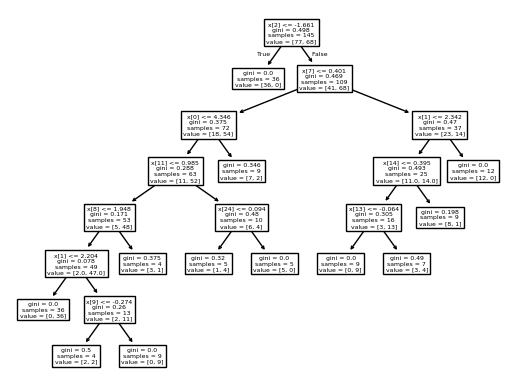

In [179]:
# Optimum Decision Tree
model6 = grid_search.best_estimator_
model6.fit(X_train_pca,Y_train)

# Accuracy on Training Data
X_train_prediction_6 = model6.predict(X_train_pca)
training_data_accuracy_6 = accuracy_score(Y_train,X_train_prediction_6)
print('Training Data Accuracy for Decision Tree = ',round(training_data_accuracy_6*100,2))

# Accuracy on Test Data
X_test_prediction_6 = model6.predict(X_test_pca)
test_data_accuracy_6 = accuracy_score(Y_test,X_test_prediction_6)
print('Test Data Accuracy for Decision Tree = ',round(test_data_accuracy_6*100,2))
scores = cross_val_score(model6,X_train_pca, Y_train, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

print('')

print(plot_tree(model6))

### Random Forest

In [180]:
# Create a Random Forest classifier
model7 = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [40, 60, 80],
    'max_depth': [None, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Set up the grid search
grid_search = GridSearchCV(estimator=model7, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_pca, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 60}
Best cross-validation score: 0.8206896551724139


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
231 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [181]:
# Optimum Random forest
model7 = grid_search.best_estimator_
model7.fit(X_train_pca,Y_train)

# Accuracy on Training Data
X_train_prediction_7 = model7.predict(X_train_pca)
training_data_accuracy_7 = accuracy_score(Y_train,X_train_prediction_7)
print('Training Data Accuracy for Random Forest = ',round(training_data_accuracy_7*100,2))

# Accuracy on Test Data
X_test_prediction_7 = model7.predict(X_test_pca)
test_data_accuracy_7 = accuracy_score(Y_test,X_test_prediction_7)
print('Training Data Accuracy for Randaom Forest = ',round(test_data_accuracy_7*100,2))

scores = cross_val_score(model7, X_train_pca, Y_train, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))


Training Data Accuracy for Random Forest =  100.0
Training Data Accuracy for Randaom Forest =  79.37
Cross-validation scores: [0.8        0.86666667 0.66666667 0.8        0.73333333 0.78571429
 0.71428571 0.92857143 0.78571429 0.57142857]
Mean cross-validation score: 0.7652380952380953


### Xgboost

In [182]:
# Xgboost

from xgboost import XGBClassifier

In [183]:
# Create a Xgboost
model8=XGBClassifier()
model5.fit(X_train_pca,Y_train)

# Accuracy on Training Data
X_train_prediction_8 = model5.predict(X_train_pca)
training_data_accuracy_8 = accuracy_score(Y_train,X_train_prediction_8)
print('Training Data Accuracy for Logistic Regression = ',round(training_data_accuracy_5*100,2))

# Accuracy on Test Data
X_test_prediction_8 = model5.predict(X_test_pca)
test_data_accuracy_8 = accuracy_score(Y_test,X_test_prediction_8)
print('Test Data Accuracy for Logistic Regression = ',round(test_data_accuracy_8*100,2))




Training Data Accuracy for Logistic Regression =  86.21
Test Data Accuracy for Logistic Regression =  77.78
